In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

from qiskit import transpile
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime import SamplerV2 as Sampler, SamplerOptions
from qiskit_ibm_runtime.fake_provider import FakeBrisbane

In [10]:
cr = ClassicalRegister(3, 'c')
qr = QuantumRegister(3, 'q')
qc = QuantumCircuit(qr, cr)

In [11]:
qc.h(0)
qc.h(1)
qc.measure(0, 0)
qc.barrier()
with qc.if_test((cr[0], 1)):
	qc.cx(1,2)
qc.measure([1,2],[1,2])

print(qc)

     ┌───┐┌─┐ ░                                 
q_0: ┤ H ├┤M├─░─────────────────────────────────
     ├───┤└╥┘ ░   ┌──────        ───────┐ ┌─┐   
q_1: ┤ H ├─╫──░───┤       ───■──        ├─┤M├───
     └───┘ ║  ░   │ If-0   ┌─┴─┐  End-0 │ └╥┘┌─┐
q_2: ──────╫──░───┤       ─┤ X ├        ├──╫─┤M├
           ║  ░   └──╥───  └───┘ ───────┘  ║ └╥┘
           ║    ┌────╨────┐                ║  ║ 
c: 3/══════╩════╡ c_0=0x1 ╞════════════════╩══╩═
           0    └─────────┘                1  2 


In [12]:
# Create the backend
backend = FakeBrisbane()

# Transpile the circuit
transpiled_circuit = transpile(qc, backend)

# Create the sampler
sampler = Sampler(backend)

# Run the circuit
job = sampler.run([transpiled_circuit], shots=1024)

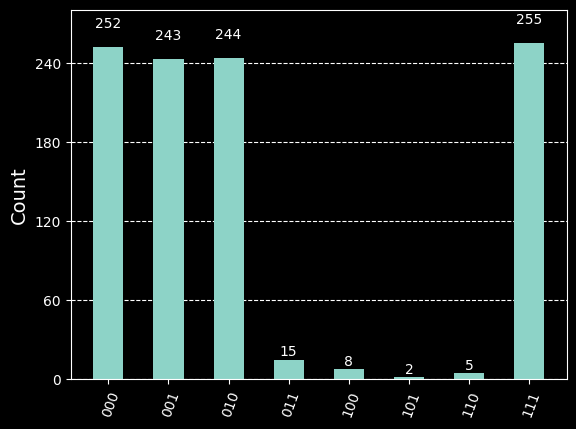

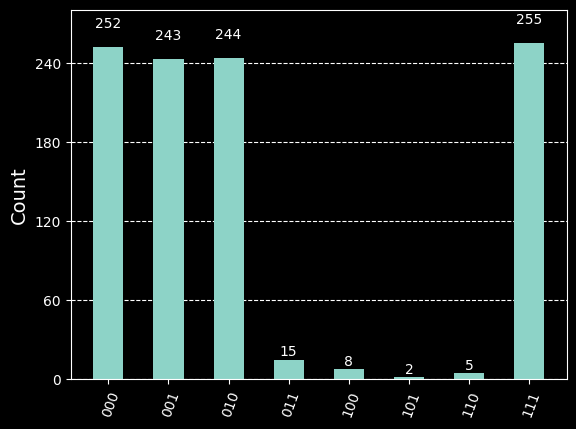

In [13]:
pub_result = job.result()[0]
counts = pub_result.data.c.get_counts()
plot_histogram(counts)